# Классификация музыки по жанрам

## Описание задачи
Вы сотрудник Отдела Data Science популярного музыкального стримингового сервиса "МиФаСоль". Сервис расширяет работу с новыми артистами и музыкантами, в связи с чем возникла задача -- правильно классифицировать новые музыкальные треки, чтобы улучшить работу рекомендательной системы. Ваши коллеги из отдела работы со звуком подготовили датасет, в котором собраны некоторые характеристики музыкальных произведений и их жанры. Ваша задача -- разработать модель, позволяющую классифицировать музыкальные произведения по жанрам.

В ходе работы в пройдете все основные этапы полноценного исследования:
загрузка и ознакомление с данными,
предварительная обработка,
полноценный разведочный анализ,
разработка новых синтетических признаков,
проверка на мультиколлинеарность,
отбор финального набора обучающих признаков,
выбор и обучение моделей,
итоговая оценка качества предсказания лучшей модели,
анализ важности ее признаков.

Дополнительное задание
Для тех, кому этого покажется мало у нас есть дополнительное задание — реализовать решение с использованием технологии pipeline (из библиотеки sklearn, imblearn).
Подготовка отчета по исследованию. Если останется время можно подготовить полноценный отчет по исследовательской работе Дата Сайнтиста. Примеры хороших отчетов можно посмотреть на сайте Stanford University - отчеты по финальным проектам направления Machine Learning - https://cs229.stanford.edu/projects2014.html. Из примеров понятно наполнение отчета по исследованию, а так же, что главное - понятна сама структура отчета. В реальной работе именно такой формат отчета обычно завершает исследование.
Мастерская будет проходить в виде соревнования на платформе Kaggle. Длительность — 2 недели. Для участников — это отличная возможность не только выполнить интересный проект, который можно будет добавить в свое портфолио, но и познакомиться с одной из самых популярных соревновательных Интернет-площадок, на которой можно исследовать и создавать модели, взаимодействовать с другими специалистами по данным, организовывать и участвовать в конкурсах, посвященных анализу данных и машинному обучению.

### 1 Импорт Библиотек

In [76]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import itertools
warnings.filterwarnings('ignore')
import math
from numpy.random import RandomState
state = 322

In [4]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_curve, roc_auc_score, precision_score, recall_score, mean_squared_error



### 2 Загрузка данных, первичное ознакомление

In [5]:
df_train = pd.read_csv('C:\data/kaggle_music_genre_train.csv')
df_test = pd.read_csv('C:\data/kaggle_music_genre_test.csv')
sample = pd.read_csv('C:\data/sample_submit.csv')

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20394 entries, 0 to 20393
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       20394 non-null  float64
 1   track_name        20394 non-null  object 
 2   acousticness      20394 non-null  float64
 3   danceability      20394 non-null  float64
 4   duration_ms       20394 non-null  float64
 5   energy            20394 non-null  float64
 6   instrumentalness  20394 non-null  float64
 7   key               19659 non-null  object 
 8   liveness          20394 non-null  float64
 9   loudness          20394 non-null  float64
 10  mode              19888 non-null  object 
 11  speechiness       20394 non-null  float64
 12  tempo             19952 non-null  float64
 13  obtained_date     20394 non-null  object 
 14  valence           20394 non-null  float64
 15  music_genre       20394 non-null  object 
dtypes: float64(11), object(5)
memory usage: 

In [7]:
df_train.head().T

,0,1,2,3,4
instance_id,25143.0,26091.0,87888.0,77021.0,20852.0
track_name,Highwayman,Toes Across The Floor,First Person on Earth,No Te Veo - Digital Single,Chasing Shadows
acousticness,0.48,0.243,0.228,0.0558,0.227
danceability,0.67,0.452,0.454,0.847,0.742
duration_ms,182653.0,187133.0,173448.0,255987.0,195333.0
energy,0.351,0.67,0.804,0.873,0.575
instrumentalness,0.0176,0.000051,0.0,0.000003,0.000002
key,D,A,E,G#,C
liveness,0.115,0.108,0.181,0.325,0.176
loudness,-16.842,-8.392,-5.225,-4.805,-5.55


In [8]:
genre_counts = df_train.groupby('music_genre')['music_genre'].count()
genre_counts

music_genre
Alternative    2601
Anime          1901
Blues          2858
Classical      1373
Country        2120
Electronic     2564
Hip-Hop        1145
Jazz           1239
Rap            2428
Rock           2165
Name: music_genre, dtype: int64

<Axes: xlabel='music_genre', ylabel='count'>

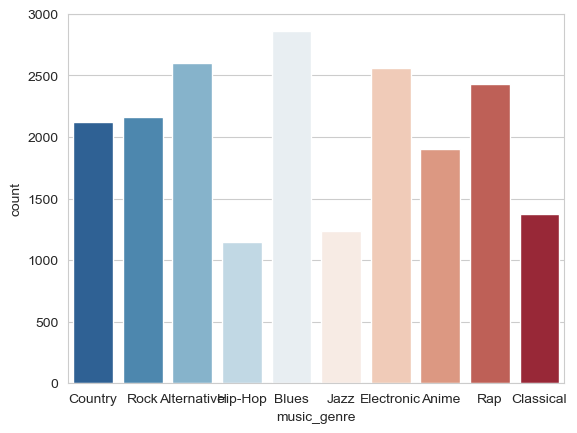

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='music_genre',data=df_train,palette='RdBu_r')

In [10]:
df_list = [df_train, df_test]

In [11]:
for i in df_list:
    print(i.isna().sum())
    print('----------')

instance_id           0
track_name            0
acousticness          0
danceability          0
duration_ms           0
energy                0
instrumentalness      0
key                 735
liveness              0
loudness              0
mode                506
speechiness           0
tempo               442
obtained_date         0
valence               0
music_genre           0
dtype: int64
----------
instance_id           0
track_name            0
acousticness          0
danceability          0
duration_ms           0
energy                0
instrumentalness      0
key                 158
liveness              0
loudness              0
mode                149
speechiness           0
tempo               121
obtained_date         0
valence               0
dtype: int64
----------


In [12]:
for i in df_list:
    print(i.duplicated().sum())
    print('----------')

0
----------
0
----------


In [13]:
cols = df_test.columns
for n in df_list:
    for i in cols:
        print(i)
        print(n[i].sort_values().unique())
        print('---------------------------')

instance_id
[20011. 20016. 20017. ... 91749. 91757. 91758.]
---------------------------
track_name
['"99"'
 '"Christen, ätzet diesen Tag", BWV 63: I. Choral "Christen, ätzet diesen Tag"'
 '"Concerto Funebre" con hautbois sordini e salmoè, violino principale e viole da gamba (Si Bem. Maggiore, RV 579): II. Allegro poco poco'
 ... '鶏と蛇と豚' '黒い弾丸' '黒い雫']
---------------------------
acousticness
[0.00e+00 1.02e-06 1.27e-06 ... 9.94e-01 9.95e-01 9.96e-01]
---------------------------
danceability
[0.06   0.0602 0.0606 0.0607 0.061  0.0614 0.0616 0.0618 0.0623 0.0624
 0.0628 0.063  0.0631 0.0637 0.0639 0.0644 0.0645 0.0646 0.065  0.0651
 0.0656 0.066  0.0662 0.0663 0.0666 0.0667 0.0676 0.0677 0.0686 0.0691
 0.0695 0.0699 0.0701 0.0708 0.0715 0.0716 0.0728 0.074  0.0744 0.0745
 0.0747 0.0753 0.0764 0.0765 0.0769 0.0775 0.0783 0.0786 0.0787 0.0789
 0.079  0.0792 0.08   0.0809 0.0816 0.0818 0.0819 0.0822 0.0828 0.0829
 0.0831 0.0832 0.0833 0.0836 0.0843 0.0845 0.085  0.0859 0.0863 0.0865
 0.0866 

In [14]:
for i in cols:
    display(df_train[i].value_counts())

25143.0    1
46033.0    1
71277.0    1
90024.0    1
74036.0    1
          ..
53482.0    1
47150.0    1
37720.0    1
83023.0    1
86375.0    1
Name: instance_id, Length: 20394, dtype: int64

Home                          11
Diamonds                       7
Summertime                     7
Gravity                        6
Dreams                         6
                              ..
Bloody F8 (feat. Aimer)        1
Willy Wonka (feat. Offset)     1
Window Pain - Outro            1
Greatness                      1
Trouble (feat. MC Spyder)      1
Name: track_name, Length: 18643, dtype: int64

0.995000    76
0.994000    76
0.991000    57
0.992000    55
0.993000    53
            ..
0.008700     1
0.000005     1
0.000464     1
0.009730     1
0.000008     1
Name: acousticness, Length: 3616, dtype: int64

0.5910    64
0.5290    64
0.5540    61
0.6480    61
0.6280    60
          ..
0.0747     1
0.0951     1
0.0699     1
0.0984     1
0.0651     1
Name: danceability, Length: 950, dtype: int64

-1.0         2009
 240000.0      16
 192000.0      16
 180000.0      13
 182400.0      10
             ... 
 198286.0       1
 142213.0       1
 368083.0       1
 223237.0       1
 271885.0       1
Name: duration_ms, Length: 13649, dtype: int64

0.84800    47
0.87300    47
0.85900    47
0.71400    46
0.90200    45
           ..
0.08790     1
0.08810     1
0.00618     1
0.02220     1
0.03950     1
Name: energy, Length: 1521, dtype: int64

0.000000    5978
0.905000      27
0.892000      26
0.898000      25
0.912000      25
            ... 
0.000008       1
0.000097       1
0.000062       1
0.000604       1
0.089700       1
Name: instrumentalness, Length: 4360, dtype: int64

G     2304
C     2149
C#    2125
D     2110
A     2013
F     1616
B     1522
E     1516
G#    1268
A#    1224
F#    1206
D#     606
Name: key, dtype: int64

0.1100    246
0.1080    245
0.1110    230
0.1070    215
0.1090    202
         ... 
0.0356      1
0.0321      1
0.5790      1
0.0444      1
0.6170      1
Name: liveness, Length: 1521, dtype: int64

-5.016     11
-5.013     11
-4.159     10
-5.202     10
-5.587      9
           ..
-8.873      1
-14.444     1
-25.808     1
-18.009     1
-1.615      1
Name: loudness, Length: 10844, dtype: int64

Major    12828
Minor     7060
Name: mode, dtype: int64

0.0332    77
0.0302    68
0.0297    68
0.0337    68
0.0352    65
          ..
0.0225     1
0.5410     1
0.7600     1
0.5960     1
0.5810     1
Name: speechiness, Length: 1243, dtype: int64

140.011    9
120.000    9
119.998    9
130.016    8
100.003    8
          ..
71.607     1
169.832    1
100.311    1
94.913     1
146.803    1
Name: tempo, Length: 15762, dtype: int64

4-Apr    18435
3-Apr     1524
5-Apr      290
1-Apr      145
Name: obtained_date, dtype: int64

0.3380    49
0.3240    43
0.5440    40
0.3720    40
0.9610    40
          ..
0.0589     1
0.0406     1
0.0452     1
0.0803     1
0.0770     1
Name: valence, Length: 1454, dtype: int64

In [15]:
for i in cols:
    display(df_test[i].value_counts())

48564    1
33413    1
64071    1
22701    1
90067    1
        ..
48775    1
79879    1
31747    1
39845    1
47986    1
Name: instance_id, Length: 5099, dtype: int64

Hurricane                                                         3
Maybe                                                             3
No Love                                                           3
Better Days                                                       3
Black Holes (Solid Ground)                                        3
                                                                 ..
Say Goodbye                                                       1
Crossfire                                                         1
What's The Frequency, Kenneth?                                    1
Watch The Tapes                                                   1
A Night In Tunisia - Remastered 1998 / Rudy Van Gelder Edition    1
Name: track_name, Length: 4981, dtype: int64

0.995000    27
0.991000    15
0.994000    15
0.989000    15
0.992000    13
            ..
0.098400     1
0.000009     1
0.003410     1
0.005950     1
0.003590     1
Name: acousticness, Length: 2275, dtype: int64

0.529    21
0.549    21
0.576    21
0.589    20
0.610    20
         ..
0.957     1
0.967     1
0.939     1
0.317     1
0.284     1
Name: danceability, Length: 820, dtype: int64

-1.0         509
 162333.0      5
 268800.0      4
 216000.0      4
 186000.0      4
            ... 
 261560.0      1
 211202.0      1
 232133.0      1
 238147.0      1
 256800.0      1
Name: duration_ms, Length: 4185, dtype: int64

0.8240    18
0.8120    17
0.9390    15
0.8490    15
0.9520    15
          ..
0.0115     1
0.0795     1
0.0301     1
0.0741     1
0.0326     1
Name: energy, Length: 1080, dtype: int64

0.000000    1510
0.862000       9
0.923000       9
0.916000       8
0.887000       8
            ... 
0.000838       1
0.000001       1
0.000002       1
0.000060       1
0.000097       1
Name: instrumentalness, Length: 2254, dtype: int64

D     557
C     530
G     527
C#    495
A     465
F     464
B     397
A#    354
E     349
F#    333
G#    314
D#    156
Name: key, dtype: int64

0.1100    62
0.1110    60
0.1090    58
0.1050    58
0.1120    56
          ..
0.0653     1
0.6840     1
0.0455     1
0.0291     1
0.0768     1
Name: liveness, Length: 1121, dtype: int64

-4.870     5
-6.799     5
-4.876     5
-7.909     5
-8.919     4
          ..
-10.572    1
-6.326     1
-5.756     1
-3.728     1
-10.127    1
Name: loudness, Length: 4209, dtype: int64

Major    3177
Minor    1773
Name: mode, dtype: int64

0.0355    24
0.0337    20
0.0318    20
0.0332    20
0.0346    19
          ..
0.0894     1
0.4370     1
0.4400     1
0.0934     1
0.0786     1
Name: speechiness, Length: 1056, dtype: int64

139.983    4
119.960    4
119.986    4
95.007     4
120.015    4
          ..
70.021     1
96.682     1
90.882     1
146.076    1
83.816     1
Name: tempo, Length: 4635, dtype: int64

4-Apr    4597
3-Apr     395
5-Apr      65
1-Apr      42
Name: obtained_date, dtype: int64

0.6160    15
0.4200    15
0.3250    14
0.5040    14
0.2050    14
          ..
0.0861     1
0.8790     1
0.0889     1
0.0290     1
0.0917     1
Name: valence, Length: 1093, dtype: int64

In [16]:
df_train.pivot_table(values=cols, index=['music_genre'],aggfunc='mean')

,acousticness,danceability,duration_ms,energy,instance_id,instrumentalness,liveness,loudness,speechiness,tempo,valence
music_genre,,,,,,,,,,,
Alternative,0.166985,0.546601,208896.554018,0.709921,55889.053825,0.062244,0.197854,-6.561434,0.089523,122.949432,0.449189
Anime,0.269231,0.470696,210078.527617,0.675377,55592.122041,0.269457,0.195141,-7.786926,0.064753,126.651741,0.435991
Blues,0.313793,0.526486,229354.083975,0.614087,55953.698740,0.091427,0.237001,-8.956438,0.061485,121.352838,0.577765
Classical,0.876544,0.303564,284025.983977,0.174565,56364.104151,0.596742,0.168227,-21.596170,0.052611,103.194000,0.208213
Country,0.275042,0.578900,195467.119811,0.636092,56271.025943,0.005260,0.184424,-7.325348,0.050289,123.220372,0.539644
Electronic,0.120547,0.618593,244518.579173,0.738151,56478.887285,0.348911,0.208292,-6.999542,0.099440,126.420326,0.388386
Hip-Hop,0.181786,0.718507,194388.653275,0.644582,56077.265502,0.010025,0.199918,-6.844419,0.208791,120.450162,0.473525
Jazz,0.500227,0.582156,243244.999193,0.471680,56268.140436,0.364615,0.172556,-11.333801,0.070873,111.487687,0.503369
Rap,0.168949,0.700364,195752.223641,0.652091,55367.535008,0.008143,0.196734,-6.649265,0.187334,119.844867,0.456786


In [17]:
df_train.pivot_table(values=['key'], index=['music_genre'],aggfunc='sum')

,key
music_genre,
Alternative,ECG#GGG#F#DCDAADGDC#GEAGAACD#DDF#CGEG#C#C#C#GG...
Anime,F#FFEDC#CGFFF#FC#BC#CC#C#G#ACDC#C#GC#ACGF#BADG...
Blues,DFFDGAG#DD#D#BA#BBDDFBAGCBCGECCD#DAG#EC#AGECEE...
Classical,DA#F#C#GFDC#DAGD#A#FGBEC#A#C#D#F#C#EAGC#EDBFA#...
Country,DAG#GC#F#FCCDF#GABD#DGFGG#C#FEBFC#G#AACA#DGGGC...
Electronic,CAFEAA#FAG#D#BA#AGC#GCDFA#GCGFCD#EBFCC#C#FEA#C...
Hip-Hop,G#A#DFCBAEC#EC#FAFAA#C#C#C#FG#ECDDD#G#C#F#GBBB...
Jazz,D#A#CECGFAGEA#ABBAG#AD#BGCCD#GEA#DGA#BDFAG#DGF...
Rap,D#FEC#DBA#C#CG#AA#A#DEFG#C#A#EGCEFGC#AAF#CC#DG...


### 3 Предобработка

уберем ненужные нам колонки

In [18]:
df_train.columns

Index(['instance_id', 'track_name', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'obtained_date', 'valence',
       'music_genre'],
      dtype='object')

In [19]:
cols_to_drop = ['duration_ms', 'obtained_date', 'track_name', 'loudness', 'key', 'mode']


Дата, название и длина песни никак не соотносятся в жанром музыки, который мы предсказываем, данные колонки будут нам только мешать

In [20]:
df_train = df_train.drop(cols_to_drop, axis=1)

In [21]:
df_test = df_test.drop(cols_to_drop, axis=1)

In [22]:
print(df_train['tempo'].median())

120.0125


In [23]:
df_train['tempo'] = df_train['tempo'].fillna(120)

In [24]:
df_test['tempo'] = df_test['tempo'].fillna(120)

In [25]:
print(df_train.isna().sum())

instance_id         0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
speechiness         0
tempo               0
valence             0
music_genre         0
dtype: int64


In [26]:
print(df_test.isna().sum())

instance_id         0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
speechiness         0
tempo               0
valence             0
dtype: int64


In [27]:
#df_train['key'] = df_train['key'].fillna('Missed')
#df_test['key'] = df_test['key'].fillna('Missed')
#df_train['mode'] = df_train['mode'].fillna('Missed')
#df_test['mode'] = df_test['mode'].fillna('Missed')

In [37]:
print(df_train.isna().sum())

instance_id         0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
speechiness         0
tempo               0
valence             0
music_genre         0
dtype: int64


In [38]:
#df_train['key'] = df_train['key'].astype('category')
#df_train['mode'] = df_train['mode'].astype('category')
#df_train['music_genre'] = df_train['music_genre'].astype('category')
#df_test['key'] = df_train['key'].astype('category')
#df_test['mode'] = df_train['mode'].astype('category')


In [39]:
numeric = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence']
categorical = ['key', 'mode']

In [41]:
le = LabelEncoder()

#df_train['key']=le.fit_transform(df_train['key'])
#df_test['key']=le.transform(df_test['key'])

#df_train['mode']=le.fit_transform(df_train['mode'])
#df_test['mode']=le.transform(df_test['mode'])

df_train['music_genre'] = le.fit_transform(df_train['music_genre'])

# Print the numerical labels


In [42]:
print(df_train['music_genre'].value_counts())


2    2858
0    2601
5    2564
8    2428
9    2165
4    2120
1    1901
3    1373
7    1239
6    1145
Name: music_genre, dtype: int64


In [47]:
#print(df_train['mode'].value_counts())

In [48]:
X = df_train.drop(columns=['music_genre', 'instance_id'])
y = df_train.music_genre
X.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,0.4800,0.670,0.351,0.017600,0.115,0.0463,101.384,0.450
1,0.2430,0.452,0.670,0.000051,0.108,0.0352,113.071,0.539
2,0.2280,0.454,0.804,0.000000,0.181,0.3710,80.980,0.344
3,0.0558,0.847,0.873,0.000003,0.325,0.0804,116.007,0.966
4,0.2270,0.742,0.575,0.000002,0.176,0.0487,76.494,0.583


In [49]:
#X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=state)

In [50]:
X_test = df_test.drop(columns='instance_id')
X_test.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,0.301000,0.757,0.679,0.00000,0.3030,0.3560,90.361,0.895
1,0.538000,0.256,0.523,0.00832,0.0849,0.0294,78.385,0.318
2,0.005830,0.678,0.770,0.00000,0.1090,0.2220,90.000,0.412
3,0.020300,0.592,0.749,0.00000,0.1220,0.0483,160.046,0.614
4,0.000335,0.421,0.447,0.01480,0.0374,0.2020,73.830,0.121


In [51]:
scaler = StandardScaler()
#encoder = OneHotEncoder(drop='first', sparse=False)


X[numeric] = scaler.fit_transform(X[numeric])
X_test[numeric] = scaler.transform(X_test[numeric])

#X_train_ohe = encoder.fit_transform(X_train[categorical])
#X_valid_ohe = encoder.transform(X_valid[categorical])
#X_test_ohe = encoder.transform(X_test[categorical])

#X_train = np.hstack((X_train_scaled, X_train_ohe))
#X_valid = np.hstack((X_valid_scaled, X_valid_ohe))
#X_test = np.hstack((X_test_scaled, X_test_ohe))

X.shape, X_test.shape, 

((20394, 8), (5099, 8))

In [52]:
y.shape 

(20394,)

### 5 Создание модели, подбор гиперпараметров

In [92]:
X_train = X
y_train = y

In [71]:
print(y_train)

0        4
1        9
2        0
3        6
4        0
        ..
20389    7
20390    9
20391    0
20392    8
20393    5
Name: music_genre, Length: 20394, dtype: int32


In [72]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [85]:
predicted_test = model.predict(X_test)

In [86]:
predicted_test = le.inverse_transform(predicted_test)

In [87]:
predicted_test

array(['Rap', 'Blues', 'Rap', ..., 'Rap', 'Electronic', 'Blues'],
      dtype=object)

In [93]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=state)

In [94]:
best_rf = None
rf_best_trees = 0
rf_best_depth = 0
rs_rf_best = 0
rf_best_score = 0

for depth,estimator in itertools.product(range(1,30,5), range(1,151,25)):
    model = RandomForestClassifier(random_state=state, max_depth=depth, n_estimators=estimator, class_weight='balanced')
    model.fit(X_train, y_train)
    predictions = model.predict(X_valid)
    fscore = f1_score(y_valid, predictions, average='micro')
    if fscore > rf_best_score:
        rf_best_score = fscore
        best_rf = model
    print('Depth: {: >5.0f}       |   Estimators: {:>5.0f}'.format(depth, estimator))
    print('F1_Score: {: >5.4f}'.format(fscore))
    print('----------------------------------------------')

Depth:     1       |   Estimators:     1
F1_Score: 0.1013
----------------------------------------------
Depth:     1       |   Estimators:    26
F1_Score: 0.2515
----------------------------------------------
Depth:     1       |   Estimators:    51
F1_Score: 0.2665
----------------------------------------------
Depth:     1       |   Estimators:    76
F1_Score: 0.2599
----------------------------------------------
Depth:     1       |   Estimators:   101
F1_Score: 0.2579
----------------------------------------------
Depth:     1       |   Estimators:   126
F1_Score: 0.2591
----------------------------------------------
Depth:     6       |   Estimators:     1
F1_Score: 0.2898
----------------------------------------------
Depth:     6       |   Estimators:    26
F1_Score: 0.3655
----------------------------------------------
Depth:     6       |   Estimators:    51
F1_Score: 0.3658
----------------------------------------------
Depth:     6       |   Estimators:    76
F1_Score: 0.36

### 6 Выгрузка предсказания, загрузка на KAggler

,instance_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,music_genre
0,48564,0.301,0.757,0.679,0.00000,0.3030,0.3560,90.361,0.895,Rap
1,72394,0.538,0.256,0.523,0.00832,0.0849,0.0294,78.385,0.318,Blues


In [89]:
music_test_kaggle = df_test.drop(['acousticness', 'danceability',
       'energy', 'instrumentalness', 'liveness',
        'speechiness', 'tempo', 'valence'], axis = 1)
music_test_kaggle

,instance_id,music_genre
0,48564,Rap
1,72394,Blues
2,88081,Rap
3,78331,Country
4,72636,Electronic
...,...,...
5094,50532,Country
5095,26255,Rap
5096,67924,Rap
5097,79778,Electronic


In [90]:
music_test_kaggle.to_csv('C:\data/pred_to_kaggle.csv',index=False, index_label=None)

NameError: name 'X_valid' is not defined

In [82]:
model = RandomForestClassifier(random_state=322, max_depth=26, n_estimators=121, class_weight='balanced')

In [95]:
best_rf

RandomForestClassifier(class_weight='balanced', max_depth=26, n_estimators=126,
                       random_state=322)

In [96]:
best_rf.fit(X, y)

RandomForestClassifier(class_weight='balanced', max_depth=26, n_estimators=126,
                       random_state=322)

In [97]:
predicted_test = best_rf.predict(X_test)

In [99]:
predicted_test = le.inverse_transform(predicted_test)

In [100]:
df_test['music_genre'] = predicted_test
df_test.head(2)

,instance_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,music_genre
0,48564,0.301,0.757,0.679,0.00000,0.3030,0.3560,90.361,0.895,Rap
1,72394,0.538,0.256,0.523,0.00832,0.0849,0.0294,78.385,0.318,Blues


In [101]:
music_test_kaggle = df_test.drop(['acousticness', 'danceability',
       'energy', 'instrumentalness', 'liveness',
        'speechiness', 'tempo', 'valence'], axis = 1)
music_test_kaggle

,instance_id,music_genre
0,48564,Rap
1,72394,Blues
2,88081,Rap
3,78331,Country
4,72636,Electronic
...,...,...
5094,50532,Country
5095,26255,Rap
5096,67924,Rap
5097,79778,Electronic


In [102]:
music_test_kaggle.to_csv('C:\data/pred_to_kaggle.csv',index=False, index_label=None)